In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("./drive/MyDrive/data.csv")
data = data.iloc[:,:17]
data.shape

(174389, 17)

In [ ]:
data2 = data[data['year'] > 1990]
data2.shape

(60691, 17)

In [ ]:
data2.head(3)

,id,name,artists,duration_ms,acousticness,energy,explicit,instrumentalness,liveness,loudness,mode,danceability,popularity,speechiness,tempo,valence,year
9071,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],160187,0.394,0.265,0,0.000000,0.149,-11.101,1,0.484,55,0.0322,113.564,0.285,2008
9081,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],141987,0.255,0.365,0,0.000005,0.163,-10.226,0,0.405,39,0.0289,104.536,0.588,2008
9085,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],157093,0.406,0.352,0,0.000000,0.122,-14.165,1,0.477,34,0.0300,106.773,0.478,2008


In [ ]:
data2.isna().sum()

id                  0
name                0
artists             0
duration_ms         0
acousticness        0
energy              0
explicit            0
instrumentalness    0
liveness            0
loudness            0
mode                0
danceability        0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
viz = data2.drop(columns=['id','name','artists','year'])

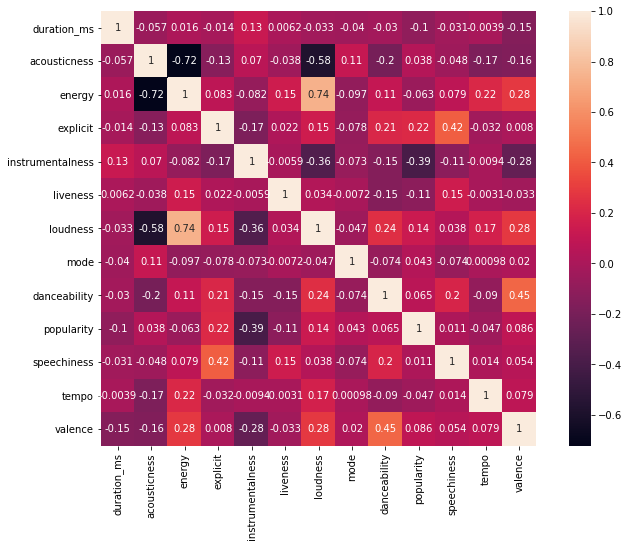

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(viz.corr(), annot=True, square=True)
plt.show()

 In this, loudness is highly correlated with energy (0.75)

In [ ]:
#normalize the data (min-max normz)

def normalize(ind):
  max_d = data2.loc[:,ind].max()
  min_d = data2.loc[:,ind].min()
  new_min = 0
  new_max = 1
  data2.loc[:,ind] = ((data2.loc[:,ind] - min_d) / (max_d - min_d))*(new_max - new_min) + new_min; 

In [ ]:
num_data = data2.select_dtypes(include=['int16','int32','int64','float16','float32','float64'])

for col in num_data.columns:
  normalize(col) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
data2.head(3)

,id,name,artists,duration_ms,acousticness,energy,explicit,instrumentalness,liveness,loudness,mode,danceability,popularity,speechiness,tempo,valence,year
9071,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,['Gerry & The Pacemakers'],0.029109,0.395582,0.265,0.0,0.000000,0.149,0.771679,1.0,0.490375,0.55,0.033472,0.510159,0.285,0.566667
9081,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,['Gerry & The Pacemakers'],0.025697,0.256024,0.365,0.0,0.000005,0.163,0.785488,0.0,0.410334,0.39,0.030042,0.469603,0.588,0.566667
9085,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,['Gerry & The Pacemakers'],0.028529,0.407631,0.352,0.0,0.000000,0.122,0.723326,1.0,0.483283,0.34,0.031185,0.479652,0.478,0.566667


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max = -1
k=0
for i in range(2,10):
  km = KMeans(n_clusters=i)
  label = km.fit_predict(num_data)
  sil_coeff = silhouette_score(num_data, label, metric='euclidean')
  print('For k= %i, Silhouette score= %.5f'%(i, sil_coeff))
  if sil_coeff > max:
    max = sil_coeff
    k = i
print('Optimal k value:',k)

For k= 2, Silhouette score= 0.97038
For k= 3, Silhouette score= 0.62592
For k= 4, Silhouette score= 0.50670
For k= 5, Silhouette score= 0.51467
For k= 6, Silhouette score= 0.52578
For k= 7, Silhouette score= 0.52511
For k= 8, Silhouette score= 0.52066
For k= 9, Silhouette score= 0.52090
Optimal k value: 2


In [ ]:
from sklearn.cluster import KMeans

k = 2
km = KMeans(n_clusters=k)
pred = km.fit_predict(num_data)
#data2['pred'] = km.fit_predict(num_data);
#normalize('pred') 

In [ ]:
num_data = num_data.values

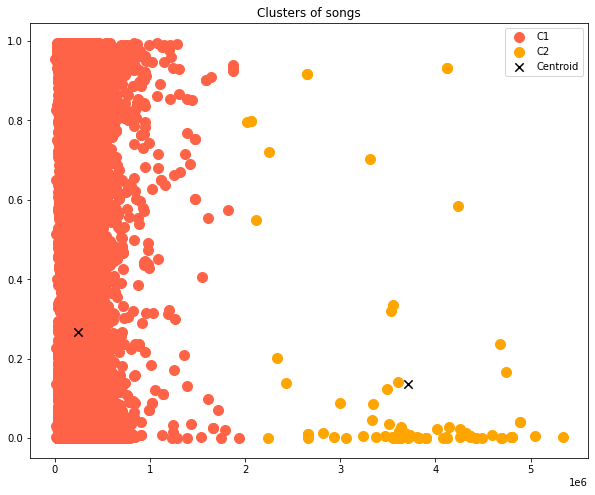

In [ ]:
plt.subplots(figsize=(10,8))
plt.scatter(num_data[pred==0, 0], num_data[pred==0, 1], s=100, c='tomato', label='C1')
plt.scatter(num_data[pred==1, 0], num_data[pred==1, 1], s=100, c='orange', label='C2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', s=70, c='black', label='Centroid')

plt.title("Clusters of songs")
plt.legend()
plt.show()

In [ ]:
# Song recommendation

class SongRecommender():
  def __init__(self, data):
    self.data = data

  def get_recommendations(self, song_name, amt=5):
    dist = []
    song = self.data[(self.data.name.str.lower() == song_name.lower())].head(1).values[0]
    fil_data = self.data[(self.data.name.str.lower() != song_name.lower())]

    for rsong in fil_data.values:
      dt = 0
      for col in np.arange(len(fil_data.columns)):
        if not col in [0,1,2,16]:
          dt = dt + np.absolute(float(song[col]) - float(rsong[col]))**2  #euclidean distance
      
      dt = np.sqrt(dt)
      dist.append(dt)
    
    fil_data['distance'] = dist
    fil_data = fil_data.sort_values('distance')
    columns = ['name','artists']
    
    return fil_data[columns][:amt]
    #return fil_data.loc[:amt, columns]

In [ ]:
# instance creation
recomn = SongRecommender(data2)

In [ ]:
# testing 1
recomn.get_recommendations("come as you are", 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,artists
19248,House of Memories,['Panic! At The Disco']
126461,カワキヲアメク,['美波']
18788,Lovers Rock,['TV Girl']
18646,Hey Brother,['Avicii']
125697,Run,['BTS']
18972,Let It Happen,['Tame Impala']


In [ ]:
# testing 2
recomn.get_recommendations("Let it Happen", 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,artists
75528,Beautiful Now,"['Zedd', 'Jon Bellion']"
15466,Dragula,['Rob Zombie']
35750,Azul,['Cristian Castro']
14063,Enter Sandman,['Metallica']
16076,Bodies,['Drowning Pool']
125697,Run,['BTS']
57376,Sugar (feat. Francesco Yates),"['Robin Schulz', 'Francesco Yates']"
